<a href="https://colab.research.google.com/github/inesbsilveira/pml-practice/blob/main/satellite_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.6 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [7]:

ims = search_images_ddg('satellite images europe')
len(ims)

200

In [8]:

dest = 'images/satellite images europe.jpg'
download_url(ims[0], dest)

Path('images/satellite images europe.jpg')

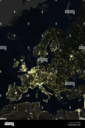

In [9]:

im = Image.open(dest)
im.to_thumb(128,128)

In [20]:

sat_img_types = 'europe','africa','north america', 'south america', 'central america', 'asia', 'oceania'
#path = Path('satellite_images')

In [21]:
path=Path('/content/images/satellite_images')

In [22]:

if not path.exists():
    path.mkdir()
    for o in sat_img_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} satellite images continents')
        download_images(dest, urls=results)

In [23]:
fns = get_image_files(path)
fns

(#1320) [Path('/content/images/satellite_images/oceania/b17fd728-b78d-457c-8d30-43d5a438ae1c.jpg'),Path('/content/images/satellite_images/oceania/8d7b195e-56b8-45af-8aea-8e39471870a9.jpg'),Path('/content/images/satellite_images/oceania/81a7d94d-cd6b-4349-81a2-83466016e8cd.jpg'),Path('/content/images/satellite_images/oceania/3d0545a0-478f-4462-94f2-12b57f51e5c5.jpg'),Path('/content/images/satellite_images/oceania/b3d8d2c5-54df-4945-8270-19c918a6e711.jpg'),Path('/content/images/satellite_images/oceania/d2ce0df8-76c2-4512-8dbe-6d60c42988a1.gif'),Path('/content/images/satellite_images/oceania/7a1469d3-cff0-48fe-996e-2082b3cdbcc4.gif'),Path('/content/images/satellite_images/oceania/f868cd62-2831-46bd-8cfb-f6ef735bb165.jpg'),Path('/content/images/satellite_images/oceania/4165d2aa-6bb0-4ebc-9e9f-ad1f1118478c.jpg'),Path('/content/images/satellite_images/oceania/872e2072-a228-4943-89cd-7f023a91249d.jpg')...]

In [24]:

failed = verify_images(fns)
failed

(#10) [Path('/content/images/satellite_images/oceania/959a86c0-5b04-4b34-bd5f-a2ab35b61376.jpg'),Path('/content/images/satellite_images/africa/9743be99-873b-45a7-b126-7a109eaebf9e.jpg'),Path('/content/images/satellite_images/africa/09902034-e1f4-4685-9f5c-06d8a421ad03.jpg'),Path('/content/images/satellite_images/europe/fdf9134b-6546-449c-9442-22f99ba47ee5.svg'),Path('/content/images/satellite_images/north america/0cd331b6-09f3-44a0-a6bf-fb928dfa7b3d.jpg'),Path('/content/images/satellite_images/asia/9a98be00-cda5-4a2d-8dc8-55ee7936e445.jpg'),Path('/content/images/satellite_images/asia/c01cc6a1-abce-416b-88bd-39441a3b142f.jpg'),Path('/content/images/satellite_images/asia/15a57cc5-374e-41a1-b534-70d2c1c80131.jpg'),Path('/content/images/satellite_images/asia/57b5bf9b-7521-40d7-ac76-9396926dbf29.jpg'),Path('/content/images/satellite_images/central america/923e7c3d-c2b6-4ce4-b319-eb97c484dd2e.jpg')]

In [25]:
failed.map(Path.unlink);

In [26]:
sat_img_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [27]:
dls = sat_img_types.dataloaders(path)

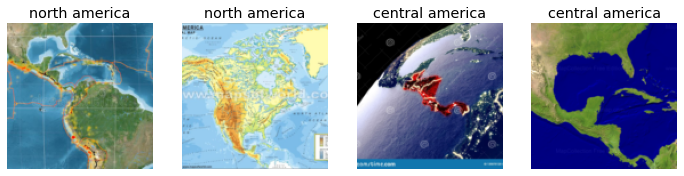

In [28]:
dls.valid.show_batch(max_n=4, nrows=1)

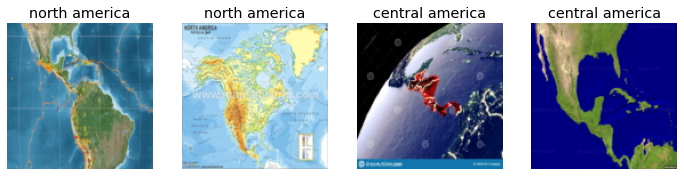

In [29]:

sat_img_types = sat_img_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = sat_img_types.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

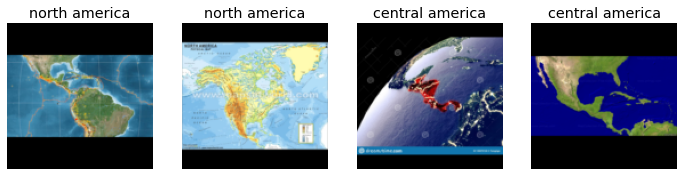

In [30]:

sat_img_types = sat_img_types.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = sat_img_types.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)
     

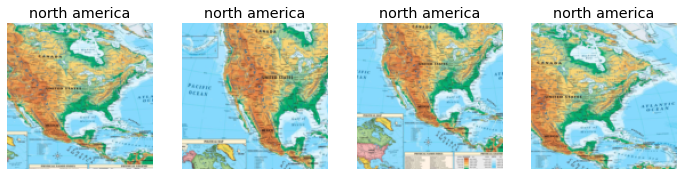

In [31]:

sat_img_types = sat_img_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = sat_img_types.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

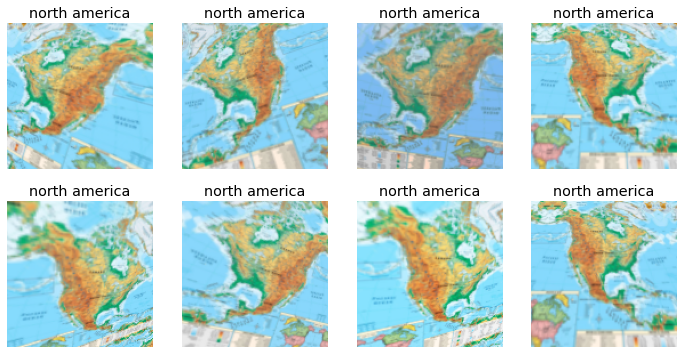

In [32]:
sat_img_types = sat_img_types.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = sat_img_types.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

###Train your model

In [33]:

sat_img_types = sat_img_types.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = sat_img_types.dataloaders(path)

In [34]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.039755,1.963272,0.664122,04:31


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,2.321006,1.714852,0.583969,06:06
1,2.112180,1.706536,0.538168,06:09
2,1.865397,1.650105,0.538168,06:37
3,1.696384,1.639165,0.519084,06:29


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should b

In [35]:
learn.export(path/'model_0.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

###Turn your model into an online App

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/satellite images europe.jpg')

In [ ]:
learn_inf.dls.vocab

### App

In [ ]:
from fastai.vision.all import *
import gradio as gr

def continent(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=continent,
    item_tfms=Resize(192))

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
learn.export('model.pkl')